<a href="https://colab.research.google.com/github/MauricioCastroF/VC1_EntregaTP/blob/main/TP2_VC1_CASTRO_FRANCO_MAURICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Trabajo práctico Nro 2:***
Mauricio Castro-Franco
---
> ***Enunciado:*** Implementar la función create_gauss_filter (h, w, k_size), 
para crear filtros 
gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño 
HxW en dominio espacial y su transformada de Fourier.



En este código se genera la función para crear el filtro gaussiano:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def create_gauss_filter(h, w, k_size, sigma):
    # Crear matriz
    filter = np.zeros((h, w))

    # Coordenadas centrales
    cx = np.floor_divide(w, 2)
    cy = np.floor_divide(h, 2)

    # Determinar valores de filtro
    for x in range(w):
        for y in range(h):
            filter[y, x] = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-((x - cx) ** 2 + (y - cy) ** 2) / (2 * sigma ** 2))

    # Aplicar transformada de furier
    filter_fft = np.fft.fftshift(np.fft.fft2(filter))

    return filter, filter_fft

En este código se aplica el filtro gaussiano a diferentes tamaños de kernels y sigmas; luego se aplica en el dominio de Fourier y se obtienen las imágenes filtradas en el dominio espacial

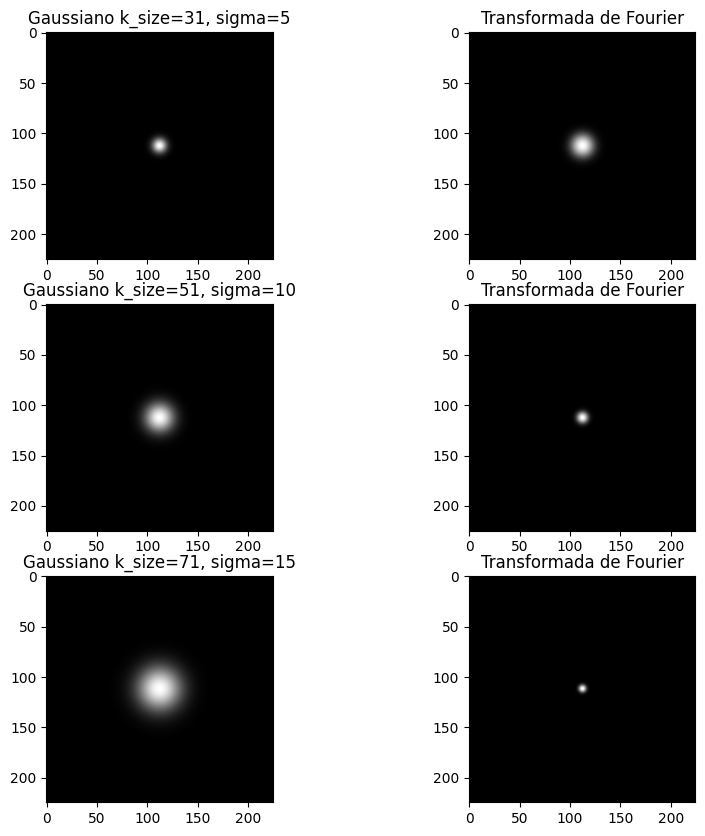

In [2]:
img = cv2.imread('/content/sample_data/troncos.jpeg', 0)
# Obtener dimensiones de la imagen
h, w = img.shape

# Filtros gaussianos con diferentes tamaños de kernel y sigma
gauss_2d_1, gauss_fft_1 = create_gauss_filter(h, w, 31, 5)
gauss_2d_2, gauss_fft_2 = create_gauss_filter(h, w, 51, 10)
gauss_2d_3, gauss_fft_3 = create_gauss_filter(h, w, 71, 15)

# Aplicar filtro gaussiano en el dominio de Fourier a la imagen
img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
img_fft_filtered_1 = img_fft * gauss_fft_1
img_fft_filtered_2 = img_fft * gauss_fft_2
img_fft_filtered_3 = img_fft * gauss_fft_3

# Obtener imágenes filtradas en el dominio espacial
img_filtered_1 = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered_1)).real
img_filtered_2 = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered_2)).real
img_filtered_3 = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered_3)).real

# Graficar filtros gaussianos y sus transformadas de Fourier
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1), plt.imshow(gauss_2d_1, cmap='gray')
plt.title('Gaussiano k_size=31, sigma=5')
plt.subplot(3, 2, 2), plt.imshow(np.log(1 + np.abs(gauss_fft_1)), cmap='gray')
plt.title('Transformada de Fourier')

plt.subplot(3, 2, 3), plt.imshow(gauss_2d_2, cmap='gray')
plt.title('Gaussiano k_size=51, sigma=10')
plt.subplot(3, 2, 4), plt.imshow(np.log(1 + np.abs(gauss_fft_2)), cmap='gray')
plt.title('Transformada de Fourier')

plt.subplot(3, 2, 5), plt.imshow(gauss_2d_3, cmap='gray')
plt.title('Gaussiano k_size=71, sigma=15')
plt.subplot(3, 2, 6), plt.imshow(np.log(1 + np.abs(gauss_fft_3)), cmap='gray')
plt.title('Transformada de Fourier')

plt.show()

***Ejercicio 2.***


---


Usando el método descripto en el paper "*Image Sharpness Measure for Blurred Images in Frequency Domain*” comparar el resultado de un filtrado por convolución con el filtrado espectral.

En este script genero una imagen borrosa que me permita potencial las comparaciones

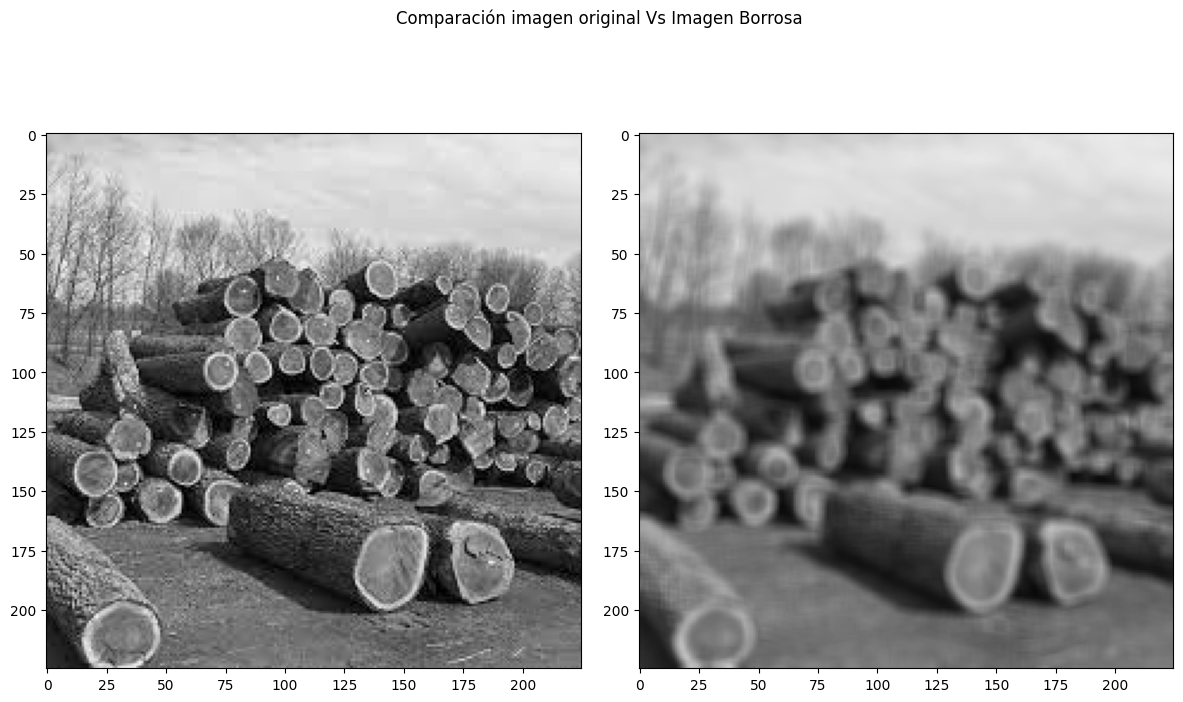

In [3]:
k = 5
kernel = np.ones((k, k), np.float32) / (k**2)

#se genera la imagen borrosa
img_blurred = cv2.filter2D(img, -1, kernel)

fig, axs = plt.subplots(1, 2, figsize=(12,8))
fig.suptitle('Comparación imagen original Vs Imagen Borrosa')
fig.tight_layout() 

axs[0].imshow(img, cmap='gray', vmin=0, vmax=255);axs[1].imshow(img_blurred, cmap='gray', vmin=0, vmax=255)

En estos scripts se calculan los diferentes métodos, incluyendo el que se propone en el paper. 

In [6]:
#Calcular la transformada de Fourier de la imagen borrosa y del kernel de desenfoque:
f = np.fft.fft2(img_blurred)
f_kernel = np.fft.fft2(kernel, s=f.shape)
f_kernel = np.fft.fftshift(f_kernel)

#Calcular la transformada de Fourier del filtro de enfoque propuesto en el artículo:
F = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
f_focus = np.fft.fft2(F, s=f.shape)
f_focus = np.fft.fftshift(f_focus)

#Multiplicar la transformada de Fourier de la imagen y el kernel de desenfoque por la transformada de Fourier del filtro de enfoque:
f_result = f * f_focus * f_kernel

#Tomar la transformada inversa de la multiplicación resultante para obtener la imagen filtrada en el dominio espacial:
img_filtered = np.fft.ifft2(f_result).real

#Calcular la energía de alta frecuencia de la imagen filtrada
f_lap = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
f_high = np.fft.fft2(f_lap, s=f.shape)
f_high = np.fft.fftshift(f_high)

#Calcular la medida de nitidez obtenida con lo propuesto por el artículo:
f_energy_paper1 = np.abs(np.sum(f_high * np.fft.fft2(img_filtered)));
sharpness_paper1 = f_energy_paper1 / (img_filtered.size)**2

En estos scripts se calcular las alta frecuencias y las medidas de nitidez, para generar los valores de la comparación.

In [7]:
#Calculo la alta frecuencia y medida de nitidez a partir de lo ejecutado en el punto 1:
f_result_gauss1 = img_filtered_1 * img_fft
img_filtered_gauss1 = np.fft.ifft2(f_result_gauss1).real
f_energy_gauss1 = np.abs(np.sum(f_high * np.fft.fft2(img_filtered_gauss1)))
sharpness_gauss1 = f_energy_gauss1 / (img_filtered_gauss1.size)**2

f_result_gauss2 = img_filtered_2 * img_fft
img_filtered_gauss2 = np.fft.ifft2(f_result_gauss2).real
f_energy_gauss2 = np.abs(np.sum(f_high * np.fft.fft2(img_filtered_gauss2)))
sharpness_gauss2 = f_energy_gauss2 / (img_filtered_gauss2.size)**2

f_result_gauss3 = img_filtered_3 * img_fft
img_filtered_gauss3 = np.fft.ifft2(f_result_gauss3).real
f_energy_gauss3 = np.abs(np.sum(f_high * np.fft.fft2(img_filtered_gauss3)))
sharpness_gauss3 = f_energy_gauss3 / (img_filtered_gauss3.size)**2

***Ejercicio 3:***


---


Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape from focus”


In [8]:
import numpy as np
import cv2

def gradient_energy(image):
    # convertir la imagen en escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # calcular los gradientes en X e Y usando Sobel
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # calcular la energía del gradiente
    energy = np.sum(grad_x**2 + grad_y**2)
    
    return energy

# Convertir la imagen a escala de grises
gray_img = cv2.imread("/content/sample_data/troncos.jpeg", cv2.IMREAD_GRAYSCALE)
gray= cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)

# Calcular la medida de enfoque utilizando el método de gradiente de Laplaciano
focus_laplacian = gradient_energy(gray)
sharpness_laplacian = focus_laplacian / (gray.size)**2

#Con el método Gaussiano
print("La medida de enfoque utilizando el método de gradiente de Energia por el método Gaussiano:", f_energy_gauss1)
print("La medida de enfoque utilizando el método de gradiente de Nitidez por el método Gaussiano:", sharpness_gauss1)

#Como dice el artículo
print("La medida de enfoque utilizando el método de gradiente de Energia por el método del paper1:", f_energy_paper1)
print("La medida de enfoque utilizando el método de gradiente de Nitidez por el método del paper1:", sharpness_paper1)

#Con el método Laplaciano
print("La medida de enfoque utilizando el método de gradiente de Energia por el método del paper2 (Gradiente Laplaciano):", focus_laplacian)
print("La medida de enfoque utilizando el método de gradiente de Nitidez por el método del paper2 (Gradiente Laplaciano):", sharpness_laplacian)


La medida de enfoque utilizando el método de gradiente de Energia por el método Gaussiano: 359109941.63947934
La medida de enfoque utilizando el método de gradiente de Nitidez por el método Gaussiano: 0.14011910541031353
La medida de enfoque utilizando el método de gradiente de Energia por el método del paper1: 15360506.955745706
La medida de enfoque utilizando el método de gradiente de Nitidez por el método del paper1: 0.00599343054514693
La medida de enfoque utilizando el método de gradiente de Energia por el método del paper2 (Gradiente Laplaciano): 1564742886.0
La medida de enfoque utilizando el método de gradiente de Nitidez por el método del paper2 (Gradiente Laplaciano): 0.06783758892038816
